# **STEP1**

Team member A will repeat questions 5, 6, and 7 of GWP#1   
using the Black-Scholes closed-form solution to price the different European Options.   
For Q7 on vega, you can use Black-Scholes closed-form solution.

In [1]:
import numpy as np
from scipy.stats import norm
import pandas as pd

def BSprice_n_Greeks(S0, K, mu, sigma, T, t, opt='call', yield_rate=0):
    dt = T - t
    vol = sigma * np.sqrt(dt)
    d1 = ( np.log(S0/K) + (mu - yield_rate + 0.5 * sigma**2) * (dt)) / vol
    d2 = d1 - sigma * np.sqrt(dt)

    if opt == 'call':
        price = (S0 * np.exp(-yield_rate * dt) * norm.cdf(d1) 
                - K * np.exp(-mu * dt) * norm.cdf(d2))
        delta = norm.cdf(d1)
        vega = S0 * norm.pdf(d1) * np.sqrt(dt) / 100

    elif opt == 'put':
        price = (K * np.exp(-mu * dt) * norm.cdf(-d2) 
                - S0 * np.exp(-yield_rate * dt) * norm.cdf(-d1))
        delta = -norm.cdf(-d1)
        vega = S0 * norm.pdf(d1) * np.sqrt(dt) / 100
    
    df = pd.DataFrame({f"price_{opt}": price, f"delta_{opt}": delta, f"vega_{opt}": vega}, index=[0])

    return df

$S_0 = 100; r = 5\%; σ = 20\%; T=3months$

In [2]:
S0 = 100
K = S0 # ATM
r = 0.05
sigma = 0.2
T = 3/12
t = 0

In [3]:
np.random.seed(0)
df_call = BSprice_n_Greeks(S0=S0, K=S0, mu=r, sigma=sigma, \
                                    T=T, t=t, opt='call', yield_rate=0)
df_put = BSprice_n_Greeks(S0=S0, K=S0, mu=r, sigma=sigma, 
                                    T=T, t=t, opt='put', yield_rate=0)

**(1)**  
Black Scholes Model:  
$$
\begin{aligned}
d1 &= \frac{ln(\frac{S}{K})+(μ-\frac{σ^2}{2})(T-t)}{σ\sqrt{T-t}} \quad & (1) \\ 
d2 &= d1 - σ \sqrt{T-t} \quad & (2)     \\
C_{BS} &= S_0 N(d1) - K e^{-rT} N(d2) \quad & (3)  \\
C_{BS} &= K e^{-rT} N(-d2) - S_0 N(-d1) \quad & (4)  \\
\end{aligned}
$$

With Black Scholes Model, the steps are continuous. So we don't need to choose number of steps.

A brief description of the overall process as follows:
1. From providing information, we calculate components of the Black Scholes model
2. Plug the numbers into d1 and d2 as formula is mentioned (1) and (2) above
3. Calculate the value of the **European Call Option** by using the Black Scholes by replacing to (3)
4. Next, we could calculate the **European Put Option** by using Put-Call Partiy or (4)
5. Lastly, we could calculate the Greeks like delta, gamma, vega, ...

In [4]:
df_call

,price_call,delta_call,vega_call
0,4.614997,0.56946,0.19644


In [5]:
df_put

,price_put,delta_put,vega_put
0,3.372777,-0.43054,0.19644


The calculated price for the ATM European options using Black Scholes model is:
* European Call Option Price = **4.61**
* European Put Option Price = **3.37**

**(6)**  
* European Call Option Delta = **0.57**  
* European Put Option Delta = **-0.43**  

The delta of the European Call Option is positive, while the Delta of the European Put Option is negative. This is consistent with the general behaviour of the options with respect to underlying asset's price movements.

Delta primarily act as a proxy for the sensitivity of the option's price to small movements in the underlying asset's price. It essentially indicates how much the price of an option is expected to change for a $1 change in the price of the underlying asset.

The positive Delta for the European call option indicates that its value is expected to increase as the underlying asset's price increases. This aligns with the nature of a call option, which provides the right to buy underlying asset. Hence, when the asset's price goes up, the option becomes more valuable.

The negative Delta for the European put option indicates that its value is expected to increase as the underlying asset's price decreases. This is consistent with the nature of a put option, which provides the right to sell the underlying asset. Therefore, when the asset's price falls, the option gains value.

The signs of Delta for oth options are in line with their respective payoff structures. A call option benefits from upward movements in the underlying asset, while a put option benefits from downward movements . This fundamental difference is reflected in the positive Delta for European calls and negative Delta European puts.

In [6]:
df_call_25 = BSprice_n_Greeks(S0=S0, K=S0, mu=r, sigma=0.25, 
                            T=T, t=t, opt='call', yield_rate=0) # sigma = 25%, opt = 'call'
df_put_25 = BSprice_n_Greeks(S0=S0, K=S0, mu=r, sigma=0.25, 
                            T=T, t=t, opt='put', yield_rate=0) # sigma = 25%, opt = 'put'

In [7]:
df_call_25

,price_call,delta_call,vega_call
0,5.5984,0.564544,0.196855


In [8]:
df_put_25

,price_put,delta_put,vega_put
0,4.35618,-0.435456,0.196855


In [23]:
callprice_change = (df_call_25.price_call - df_call.price_call) / (0.25 - 0.2) / 100
putprice_change = (df_put_25.price_put - df_put.price_put) / (0.25 - 0.2) / 100
print(f"Change call price respect to change of volatility: {callprice_change[0]:.2f}")
print(f"Change put price respect to change of volatility: {putprice_change[0]:.2f}")

Change call price respect to change of volatility: 0.20
Change put price respect to change of volatility: 0.20


European Call Option
* New price with 25% volatility : 5.60
* Increase in Price (Vega for European Call) : 0.20

European Put Option
* New price with 25% volatility : 4.36
* Increase in Price(Vega for European Put) : 0.20

Both the European call and put option prices increased with the rise in volatility. The increase was approximately **0.20** for both options for each increasing percentage. This indicates that both call and put options become more valuable as the uncertainty or volatility in the underlying asset increases.

**Vega**, the sensitivity of option prices to volatility, is always positive for both call and put options. This is because increased volatility leads to greater uncertainty and a higher chance of the option ending in-the-money, which in turn increases the option's value.

The impact of the increase in volatility was similar for both the call and put options. This is often the case for at-the-money options. Both types of options benefit from increased volatility because it increases the probability of significant price movemeents, either up or down, which can be advantages for option holders.

But note that while the numerical impact was similar, the context differs. For the call option, higher volatility increases the potential for upside movements, making the right to buy more valuable. For the put option, higher volatility amplifies the potential for downside movements, making the right to sell more valuable.

# **STEP2**

In step 2, you will still work with the input data from questions from 5, 6, and 7 from GWP#1, in this case for American derivatives. Specifically  
4. **Team member A** will use Monte-Carlo methods with regular GBM process and daily simulations on an American Call option. Remember to answer the different questions in the original GWP#1:  
price (Q5),  
calculate delta (Q6) and  
vega (Q7) only for the Call option case.

In [22]:
import numpy as np

class AmericanOption_MC(object):
    """
    Class for the American model using Longstaff-Schwartz (2001)
    S0: Stock price 
    K: Strike price
    mu: interest rate
    sigma: volatility
    T: time to maturity
    M: steps to maturity
    opt: option type "call" or "put"
    Ite: Iterations
    """
    def __init__(self, S0, K, r, sigma, T, M, opt, Ite):
    
        try:
            self.S0 = float(S0)
            self.K = float(K)
            # assert mu >= 0
            self.r = float(r)
            assert sigma >= 0
            self.sigma = float(sigma)
            assert T >= 0
            self.T = float(T)
            assert M >= 0
            self.M = int(M)
            assert isinstance(opt, str)
            self.opt = opt
            assert Ite > 0
            self.Ite = int(Ite)
        except ValueError:
            print("Please values agian")

        self.dt = self.T/float(self.M)
        self.discount = np.exp(-self.r * self.dt)

    @property
    def MCprice_matrix(self, seed = 42):

        np.random.seed(seed)
        MCprice_matrix = np.zeros((self.M + 1, self.Ite), dtype=np.float64)
        MCprice_matrix[0, :] = self.S0
        for t in range(1, self.M + 1):
            z = np.random.standard_normal(int(self.Ite / 2) )
            z = np.concatenate((z, -z))
            MCprice_matrix[t, :] = (MCprice_matrix[t-1, :]
                                    * np.exp((self.r - self.sigma ** 2 / 2.) * self.dt
                                    + z * self.sigma * np.sqrt(self.dt)))

        return MCprice_matrix

    @property
    def payoff(self):
      
        if self.opt == 'call':
            payoff = np.maximum(self.MCprice_matrix - self.K, 
                                np.zeros((self.M + 1, self.Ite), dtype=np.float64))
        else:
            payoff = np.maximum(self.K - self.MCprice_matrix, 
                                np.zeros((self.M + 1, self.Ite), dtype=np.float64))
        return payoff

    @property
    def MCprice(self):
        value_matrix = np.zeros_like(self.payoff)
        value_matrix[-1, :] = self.payoff[-1, :]
        for t in range(self.M - 1, 0, -1):
            reg = np.polyfit(self.MCprice_matrix[t, :], value_matrix[t+1, :] * self.discount, deg=5)
            continuous_value = np.polyval(reg, self.MCprice_matrix[t, :])
            value_matrix[t, :] = np.where(
                self.payoff[t, :] > continuous_value,
                self.payoff[t, :],
                value_matrix[t + 1, :] * self.discount
            )
        return value_matrix[1, :] * self.discount

    @property
    def price(self):
        return np.sum(self.MCprice) / float(self.Ite)

    @property
    def delta(self):
        diff = self.S0 * 0.01
        myCall_1 = AmericanOption_MC(self.S0 + diff, self.K, self.r, 
                    self.sigma, self.T, self.M, self.opt, self.Ite)
        myCall_2 = AmericanOption_MC(self.S0 - diff, self.K, self.r, 
                    self.sigma, self.T, self.M, self.opt, self.Ite)
        return (myCall_1.price - myCall_2.price) / float(2. * diff)
 
    @property
    def vega(self):
        diff = self.sigma * 0.01
        my_Call1 = AmericanOption_MC(self.S0, self.K, self.r, 
                  self.sigma + diff, self.T, self.M, self.opt, self.Ite)
        my_Call2 = AmericanOption_MC(self.S0, self.K, self.r, 
                  self.sigma - diff, self.T, self.M, self.opt, self.Ite)
        
        return (my_Call1.price - my_Call2.price) / float(2 * diff)

S0 = 100
K = S0 # ATM
r = 0.05
sigma = 0.2
T = 3/12
t = 0
M = 90
opt = 'put'
Ite = 5000

AmericanOptionMC = AmericanOption_MC(S0=S0, K=K, r=r, sigma=sigma, T=T, M=M, opt=opt, Ite=Ite)

print(AmericanOptionMC.price) 
print(AmericanOptionMC.delta)
print(AmericanOptionMC.vega)

3.4486638634945637
-0.4801527596559194
19.04169304710157


The American Call Option for using Monte Carlo simulations is: **4.47**

# **STEP3**

**Team member A** will work with European options with same characteristics as GWP#1 under different levels of moneyness:  
a. Price an European Call option with 110% moneyness and an European Put with 95% moneyness using Black-Scholes. Both have 3 months maturity.  

In [2]:
S0 = 100
K = 110 # 110% moneyness
r = 0.05
sigma = 0.2
T = 3/12
t = 0
opt = 'call'

BSprice_n_Greeks(S0=S0, K=K, mu=r, sigma=sigma, T=T, t=t, opt=opt)

,price_call,delta_call,vega_call
0,1.191132,0.218255,0.14737


In [3]:
S0 = 100
K = 95 # 95% moneyness
r = 0.05
sigma = 0.2
T = 3/12
t = 0
opt = 'put'

BSprice_n_Greeks(S0=S0, K=K, mu=r, sigma=sigma, T=T, t=t, opt=opt)

,price_put,delta_put,vega_put
0,1.53426,-0.245748,0.15744


b. You build a portfolio that buys the previous Call and Put options. What is the delta of the portfolio? How would you delta-hedge this portfolio?  

In [4]:
import numpy as np
from scipy.stats import norm
import pandas as pd

def Portfolio_Long_Long(S0, K_call, K_put, mu, sigma, T, t, yield_rate=0):
    dt = T - t
    vol = sigma * np.sqrt(dt)

    # long call    
    d1_call = ( np.log(S0/K_call) + (mu - yield_rate + 0.5 * sigma**2) * (dt)) / vol
    d2_call = d1_call - sigma * np.sqrt(dt)
    price_call = (S0 * np.exp(-yield_rate * dt) * norm.cdf(d1_call) 
                - K_call * np.exp(-mu * dt) * norm.cdf(d2_call))
    delta_call = norm.cdf(d1_call)

    # long put
    d1_put = ( np.log(S0/K_put) + (mu - yield_rate + 0.5 * sigma**2) * (dt)) / vol
    d2_put = d1_put - sigma * np.sqrt(dt)
    price_put = (K_put * np.exp(-mu * dt) * norm.cdf(-d2_put) 
                - S0 * np.exp(-yield_rate * dt) * norm.cdf(-d1_put))
    delta_put = -norm.cdf(-d1_put)

    # long call + long put
    price = price_call + price_put
    delta = delta_call + delta_put
    
    df = pd.DataFrame({f"price_portfolio": price, f"delta_portfolio": delta}, index=[0])
    
    return df

In [5]:
S0 = 100
K_call = 110
K_put = 95
r = 0.05
sigma = 0.2
T = 3/12
t = 0

LongCall_LongPut = Portfolio_Long_Long(S0=S0, K_call=K_call, K_put=K_put, mu=r, sigma=0.25, 
                            T=T, t=t, yield_rate=0)

LongCall_LongPut

,price_portfolio,delta_portfolio
0,4.334563,-0.009115


In [8]:
LongLong = pd.DataFrame()

for i in range(80,120):
    LongCall_LongPut = Portfolio_Long_Long(S0=i, K_call=K_call, K_put=K_put, mu=r, sigma=0.25, 
                            T=T, t=t, yield_rate=0)
    LongLong = pd.concat((LongLong, LongCall_LongPut), ignore_index=True)

LongLong.head()

,price_portfolio,delta_portfolio
0,14.366634,-0.878765
1,13.499034,-0.855995
2,12.655540,-0.830540
3,11.838864,-0.802355
4,11.051746,-0.771424


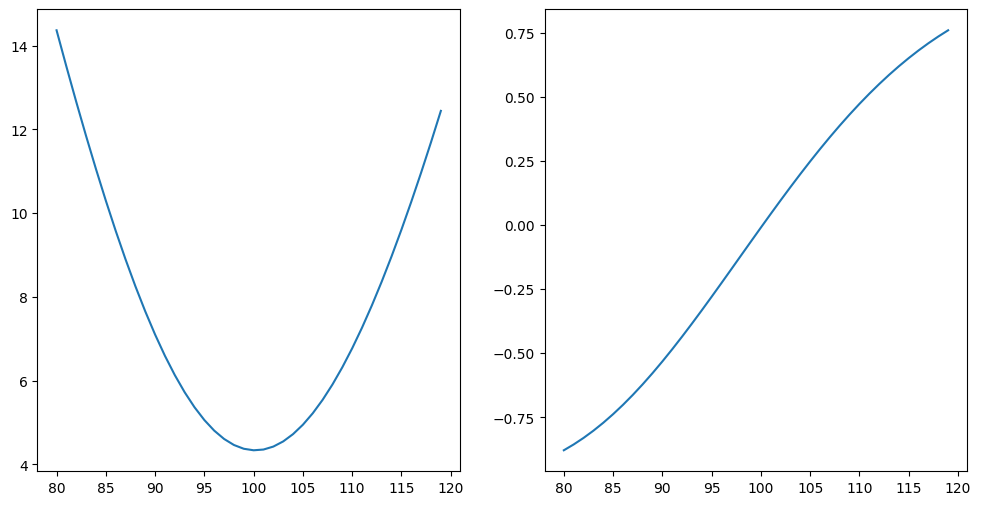

In [9]:
import matplotlib.pyplot as plt

fig, [ax1, ax2] = plt.subplots(ncols=2, nrows=1, figsize=(12,6))

ax1.plot(np.arange(80,120), LongLong.price_portfolio);
ax2.plot(np.arange(80,120), LongLong.delta_portfolio);

c. You build a second portfolio that buys the previous Call option and sells the Put. What is the delta of the portfolio? How would you delta-hedge this portfolio?

In [6]:
import numpy as np
from scipy.stats import norm
import pandas as pd

def Portfolio_Long_Short(S0, K_call, K_put, mu, sigma, T, t, yield_rate=0):
    dt = T - t
    vol = sigma * np.sqrt(dt)

    # long call    
    d1_call = ( np.log(S0/K_call) + (mu - yield_rate + 0.5 * sigma**2) * (dt)) / vol
    d2_call = d1_call - sigma * np.sqrt(dt)
    price_call = (S0 * np.exp(-yield_rate * dt) * norm.cdf(d1_call) 
                - K_call * np.exp(-mu * dt) * norm.cdf(d2_call))
    delta_call = norm.cdf(d1_call)

    # short put
    d1_put = ( np.log(S0/K_put) + (mu - yield_rate + 0.5 * sigma**2) * (dt)) / vol
    d2_put = d1_put - sigma * np.sqrt(dt)
    price_put = - (K_put * np.exp(-mu * dt) * norm.cdf(-d2_put) 
                - S0 * np.exp(-yield_rate * dt) * norm.cdf(-d1_put))
    delta_put = norm.cdf(-d1_put)

    # long call + short put
    price = price_call + price_put
    delta = delta_call + delta_put
    
    df = pd.DataFrame({f"price_portfolio": price, f"delta_portfolio": delta}, index=[0])
    
    return df

In [7]:
S0 = 100
K_call = 110
K_put = 95
r = 0.05
sigma = 0.2
T = 3/12
t = 0

LongCall_ShortPut = Portfolio_Long_Short(S0=S0, K_call=K_call, K_put=K_put, mu=r, sigma=0.25, 
                            T=T, t=t, yield_rate=0)

LongCall_ShortPut

,price_portfolio,delta_portfolio
0,-0.37355,0.557634


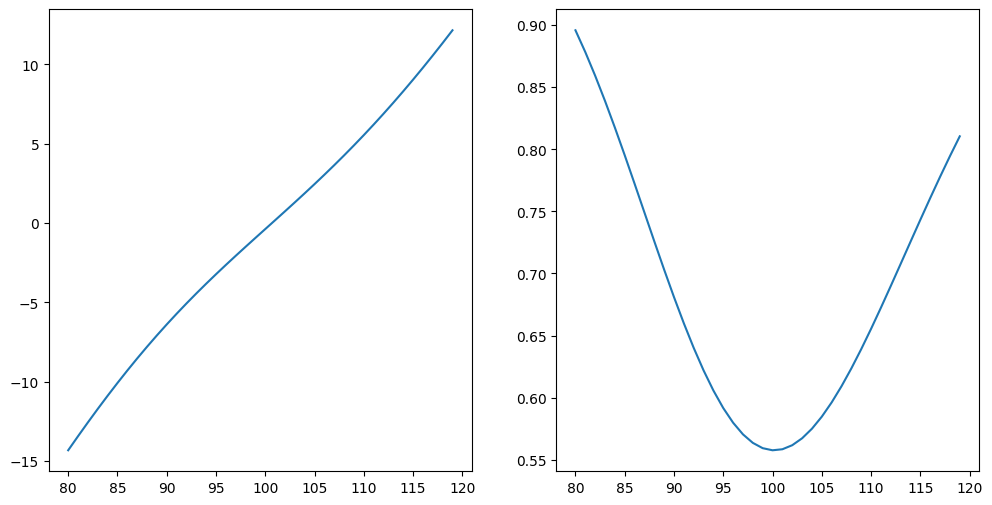

In [10]:
LongShort = pd.DataFrame()

for i in range(80,120):
    LongCall_ShortPut = Portfolio_Long_Short(S0=i, K_call=K_call, K_put=K_put, mu=r, sigma=0.25, 
                            T=T, t=t, yield_rate=0)
    LongShort = pd.concat((LongShort, LongCall_ShortPut), ignore_index=True)

LongShort.head()

fig, [ax1, ax2] = plt.subplots(ncols=2, nrows=1, figsize=(12,6))

ax1.plot(np.arange(80,120), LongShort.price_portfolio);
ax2.plot(np.arange(80,120), LongShort.delta_portfolio);